In [24]:
# Imports

In [2]:
import numpy as np
import pandas as pd
import os
import scipy

from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')


import itertools as it

%config InteractiveShell.ast_node_interactivity='all'
%config InlineBackend.figure_format = 'svg'

In [3]:
# Data

In [6]:

total_spectrum_data = '../data_o/calibration/single_species_calibration/parsed_data/ss_total_spectrum.csv'

In [7]:
df = pd.read_csv(total_spectrum_data)
for col in df.columns[5:]:
    df[col] = df[col] - df[col][95]


In [8]:
df.tail()


,well,row,col,320,325,330,335,340,345,350,...,755,760,765,770,775,780,785,790,795,800
91,H8,H,8,0.6348,0.6033,0.2007,0.2008,0.1995,0.1961,0.1925,...,0.0772,0.0764,0.0753,0.0743,0.0734,0.0727,0.0720,0.0714,0.0707,0.0702
92,H9,H,9,0.5597,0.5304,0.1294,0.1306,0.1309,0.1295,0.1278,...,0.0567,0.0563,0.0556,0.0550,0.0544,0.0541,0.0536,0.0532,0.0527,0.0524
93,H10,H,10,0.5010,0.4717,0.0706,0.0712,0.0714,0.0709,0.0702,...,0.0315,0.0313,0.0310,0.0307,0.0303,0.0302,0.0299,0.0297,0.0294,0.0292
94,H11,H,11,0.4401,0.4111,0.0096,0.0100,0.0101,0.0102,0.0105,...,0.0049,0.0049,0.0047,0.0048,0.0046,0.0046,0.0046,0.0045,0.0044,0.0045
95,H12,H,12,0.4316,0.4019,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [9]:
# linear curve
def linear_curve(parameters, xdata):
    """
    A680 & A750 show a linear relationship:
    y = m*x + b
    
    m = slope
    b = y-intercept
    """
    m = parameters[0]
    b = parameters[1]
    
    return m*xdata + b


def linear_curve_residuals(parameters, xdata, ydata, function):
    """
    xdata = [chlamy] or [bacter]
    
    ydata = observed A680 or A750
    
    Computes the residuals of y_pred -y_obs, where:
        y_pred = line(parameters, xdata)
    """
    
    return linear_curve(parameters,xdata) - ydata

In [10]:
chlamy_cnt = df['chlamy_cnt'].unique()
rows = df['row'].unique()
# store absorbance values that will be plotted on one figure   B
corr_abs_680 = []
corr_abs_720 = []
for row in rows:
    
    #append the values to their respective list
    corr_abs_680.append(df.loc[df['row']==row, '680'].to_list())
    corr_abs_720.append(df.loc[df['row']==row, '720'].to_list())


bacter_cnt = df['bact_cnt'].unique()
cols = df['col'].unique()

# store fluorescence values
corr_abs_680_col = []
corr_abs_720_col = []
for col in cols:
    
    # append
    corr_abs_680_col.append(df.loc[df['col']==col, '680'].to_list())
    corr_abs_720_col.append(df.loc[df['col']==col, '720'].to_list())
   

KeyError: 'chlamy_cnt'

params_A680_B = []
x0=[0,0]
for ydata in corr_abs_680:
    optimize_result = scipy.optimize.least_squares(linear_curve_residuals, x0, 
                                               args = (chlamy_cnt, ydata,
                                                      linear_curve))
    params_A680_B.append(optimize_result.x)
    
    
    
params_A680_C = []
x0=[0,0]
for ydata in corr_abs_680_col:
    optimize_result = scipy.optimize.least_squares(linear_curve_residuals, x0, 
                                               args = (bacter_cnt, ydata,
                                                      linear_curve))
    params_A680_C.append(optimize_result.x)
    
    
    
params_A720_B = []
x0=[0,0]
for ydata in corr_abs_720:
    optimize_result = scipy.optimize.least_squares(linear_curve_residuals, x0, 
                                               args = (chlamy_cnt, ydata,
                                                      linear_curve))
    params_A720_B.append(optimize_result.x)
    
    
    
params_A720_C = []
x0=[0,0]
for ydata in corr_abs_720_col:
    optimize_result = scipy.optimize.least_squares(linear_curve_residuals, x0, 
                                               args = (bacter_cnt, ydata,
                                                      linear_curve))
    params_A720_C.append(optimize_result.x)

k_C = params_A680_B[7][0]
k_B = params_A680_C[11][0]
kp_C = params_A720_B[7][0]
kp_B = params_A720_C[11][0]



k_C
k_B
kp_C
kp_B
    # k_C == A680_B[7]
    # k_B == A680_C[11]
    # kp_C == A750_B[7]
    # kp_B == A750_C[11]
    
#    
##all_model_parameters['A680_B'] = params_A680_B[7]
#all_model_parameters['k_6C'] = params_A680_B[7]


##all_model_parameters['A680_C'] = params_A680_C[11]
#all_model_parameters['k_6B'] = params_A680_C[11]

##all_model_parameters['A750_B'] = params_A750_B[7]
#all_model_parameters['k_7C'] = params_A750_B[7]

##all_model_parameters['A750_C'] = params_A750_C[11]
#all_model_parameters['k_7B'] = params_A750_C[11]

#all_model_parameters['F680_B'] = params_F680[7]

In [9]:
#predicted values from simple lineaer regression models

#df['abs_680_prd'] = k_C*df['chlamy_cnt'] + k_B*df['bact_cnt']
#df['abs_750_prd'] = kp_C*df['chlamy_cnt']+ kp_B*df['bact_cnt']

df['bacter_cnt_prd'] = (df['680']*kp_C - df['720']*k_C) / (k_B*kp_C - kp_B*k_C)
df['chlamy_cnt_prd'] = (df['680']*kp_B - df['720']*k_B) / (kp_B*k_C - k_B*kp_C)

NameError: name 'kp_C' is not defined

In [10]:
df

,well,row,col,320,325,330,335,340,345,350,...,755,760,765,770,775,780,785,790,795,800
0,A1,A,1,1.2715,1.2378,0.8349,0.8356,0.8319,0.8219,0.8098,...,0.4148,0.4122,0.4095,0.4067,0.4043,0.4019,0.3995,0.3977,0.3955,0.3937
1,A2,A,2,1.2151,1.1807,0.7764,0.7755,0.7713,0.7611,0.7491,...,0.3880,0.3855,0.3829,0.3801,0.3777,0.3757,0.3731,0.3710,0.3688,0.3669
2,A3,A,3,1.2205,1.1854,0.7801,0.7781,0.7734,0.7616,0.7489,...,0.3837,0.3815,0.3789,0.3759,0.3739,0.3716,0.3693,0.3674,0.3651,0.3631
3,A4,A,4,1.1372,1.1026,0.6967,0.6942,0.6893,0.6797,0.6694,...,0.3573,0.3552,0.3529,0.3506,0.3485,0.3468,0.3444,0.3425,0.3404,0.3386
4,A5,A,5,1.1422,1.1078,0.7029,0.7010,0.6965,0.6876,0.6772,...,0.3509,0.3486,0.3464,0.3445,0.3421,0.3403,0.3379,0.3361,0.3341,0.3324
5,A6,A,6,1.0666,1.0319,0.6262,0.6227,0.6183,0.6102,0.6018,...,0.3249,0.3231,0.3210,0.3192,0.3172,0.3155,0.3135,0.3121,0.3103,0.3088
6,A7,A,7,1.0707,1.0360,0.6302,0.6271,0.6222,0.6141,0.6051,...,0.3138,0.3120,0.3102,0.3083,0.3064,0.3047,0.3029,0.3015,0.2998,0.2984
7,A8,A,8,0.9731,0.9379,0.5308,0.5257,0.5201,0.5125,0.5050,...,0.2823,0.2807,0.2791,0.2773,0.2757,0.2742,0.2726,0.2713,0.2698,0.2684
8,A9,A,9,0.9255,0.8915,0.4853,0.4811,0.4763,0.4697,0.4639,...,0.2727,0.2710,0.2694,0.2676,0.2660,0.2645,0.2629,0.2616,0.2600,0.2587
9,A10,A,10,0.8901,0.8552,0.4473,0.4415,0.4357,0.4296,0.4236,...,0.2544,0.2533,0.2519,0.2506,0.2495,0.2484,0.2471,0.2460,0.2447,0.2436


In [12]:
df_main = df.copy()

Text(0.5, 1.0, 'Predicted vs. Actual [B]')

Text(0, 0.5, '$\\hat{[B]}$$_{pred}$')

Text(0.5, 0, '$[B]_{known}$')

(-0.01, 0.25)

(-0.01, 0.25)

Text(0.5, 1.0, 'Predicted vs. Actual [B]')

Text(0, 0.5, '$\\hat{[B]}$$_{pred}$')

Text(0.5, 0, '$[B]_{known}$')

(-0.01, 0.25)

(-0.01, 0.25)

Text(0.5, 0.95, '[Bacteria] Predictions Using Simple Linear Regression Models')

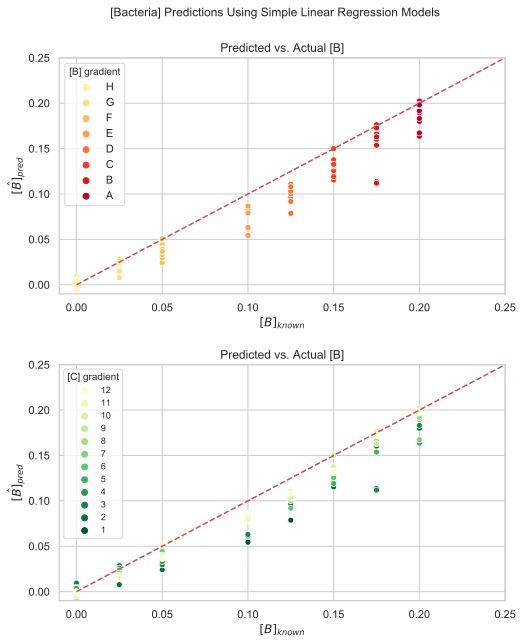

In [13]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))


sns.scatterplot(x='bact_cnt', y='bacter_cnt_prd', data=df_main, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [B]')
axes[0].set_ylabel('$\hat{[B]}$$_{pred}$')
axes[0].set_xlabel('$[B]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.25)
axes[0].set_ylim(bottom=-0.01, top=.25)



sns.scatterplot(x='bact_cnt', y='bacter_cnt_prd', data=df_main, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
               loc=2, prop={'size':9})
axes[1].set_title('Predicted vs. Actual [B]')
axes[1].set_ylabel('$\hat{[B]}$$_{pred}$')
axes[1].set_xlabel('$[B]_{known}$')

axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.25)
axes[1].set_ylim(bottom=-0.01, top=.25)


fig.suptitle("[Bacteria] Predictions Using Simple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)

fig.savefig("Predicted [B] with SLR Models")

plt.show()
plt.close()

Text(0.5, 1.0, 'Predicted vs. Actual [C]')

Text(0, 0.5, '$\\hat{[C]_{pred}}$')

Text(0.5, 0, '$[C]_{known}$')

(-0.01, 0.3)

(-0.01, 0.3)

Text(0.5, 1.0, 'Predicted vs. Actual [C]')

Text(0, 0.5, '$\\hat{[C]_{pred}}$')

Text(0.5, 0, '$[C]_{known}$')

(-0.01, 0.3)

(-0.01, 0.3)

Text(0.5, 0.95, '[Chlamy] Predictions Using Simple Linear Regression Models')

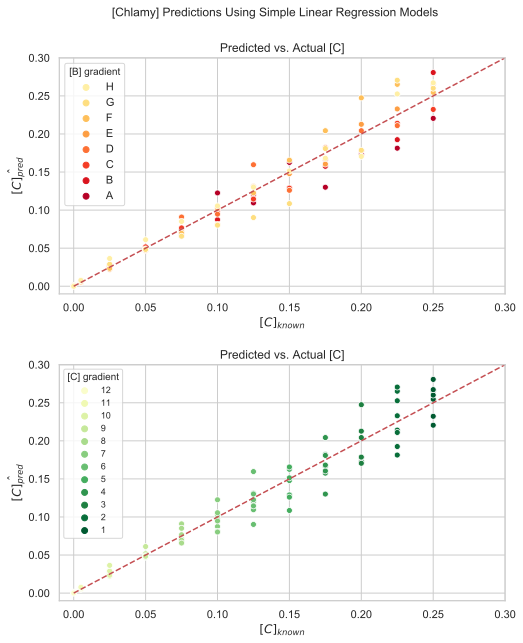

In [14]:
fig=plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(2,1)
axes = []
for r in [0,1]:
    for c in [0]:
        axes.append(fig.add_subplot(gs[r,c]))


sns.scatterplot(x='chlamy_cnt', y='chlamy_cnt_prd', data=df_main, hue='row',
                palette=sns.color_palette("YlOrRd_r", 8), ax=axes[0])


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient')
axes[0].set_title('Predicted vs. Actual [C]')
axes[0].set_ylabel('$\hat{[C]_{pred}}$')
axes[0].set_xlabel('$[C]_{known}$')

axes[0].plot((0,1), 'r--',)
axes[0].set_xlim(left=-0.01, right=.30)
axes[0].set_ylim(bottom=-0.01, top=.30)


sns.scatterplot(x='chlamy_cnt', y='chlamy_cnt_prd', data=df_main, hue='col',
                palette=sns.color_palette("YlGn_r", 12), ax=axes[1])

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
              prop={'size':9}, loc=2)
axes[1].set_title('Predicted vs. Actual [C]')
axes[1].set_ylabel('$\hat{[C]_{pred}}$')
axes[1].set_xlabel('$[C]_{known}$')

axes[1].plot((0,1), 'r--',)
axes[1].set_xlim(left=-0.01, right=.30)
axes[1].set_ylim(bottom=-0.01, top=.30)

fig.suptitle("[Chlamy] Predictions Using Simple Linear Regression Models", y=.95)
fig.subplots_adjust(hspace=.3)
fig.savefig("Predicted [C] with SLR Models")

plt.show()
plt.close()

In [ ]:
for col in df.columns[5:]:
    df[col] = df[col] - df[col][95]
    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
fig=df.iloc[:90,5:].corr().style.background_gradient(cmap='coolwarm')

In [ ]:
figt=df.iloc[:,5:].transpose().plot(legend=False, figsize=(10,30)

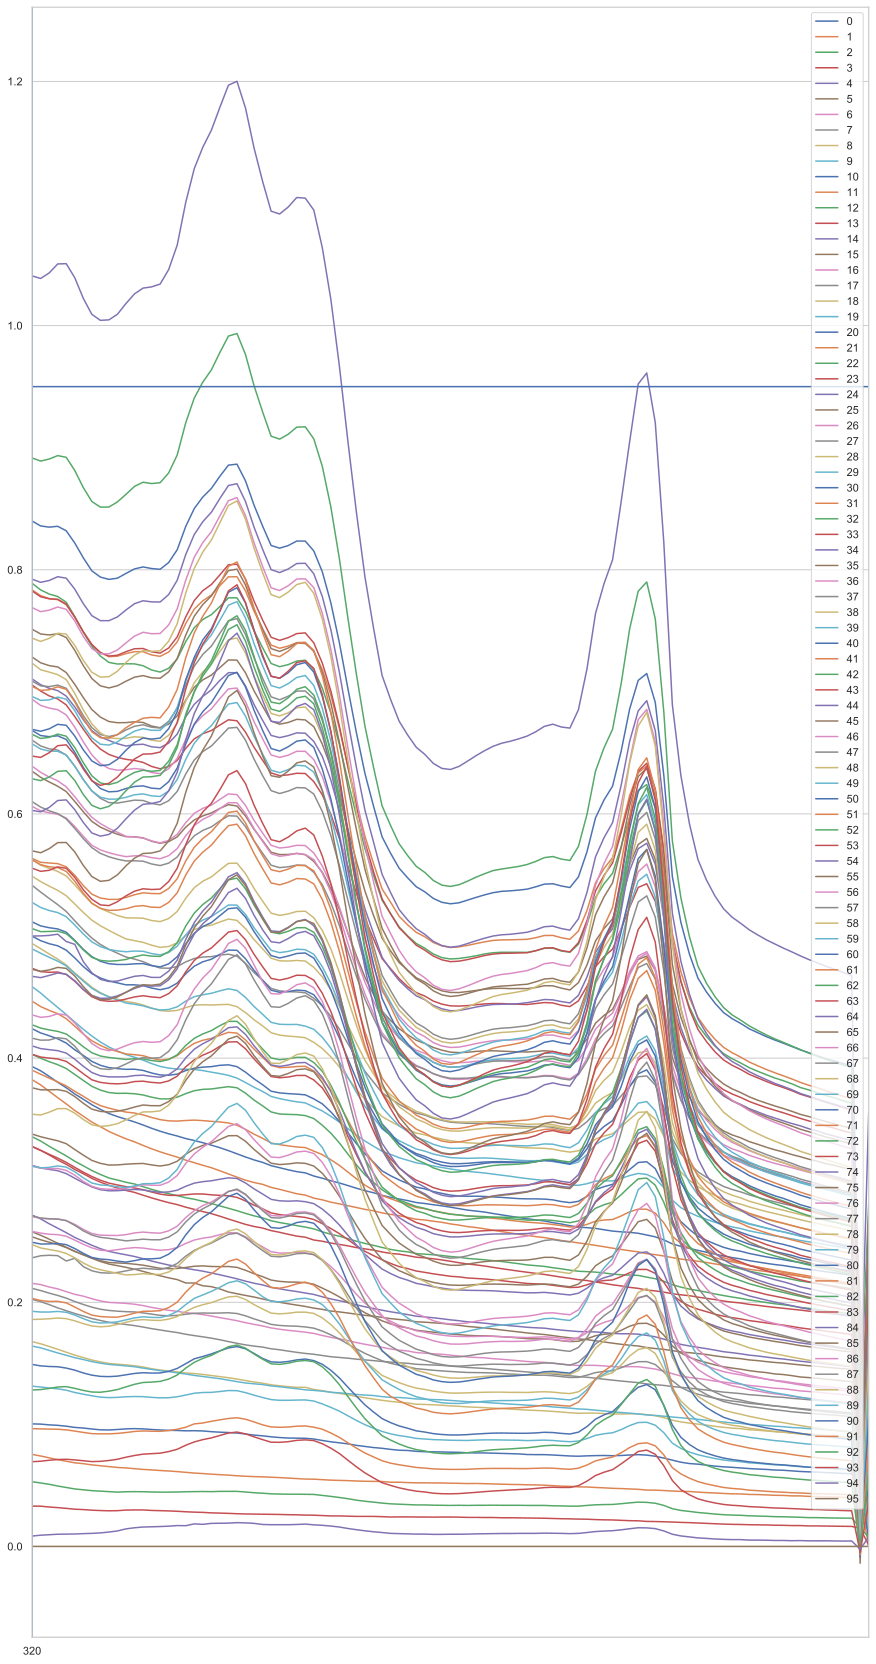

In [23]:
fig,ax1 = plt.subplots()
df.iloc[:,5:].transpose().plot(figsize=(15,30), ax=ax1)
ax1.axvline(')
ax1.axhline(y=.95)

In [ ]:
df.iloc[:,5:].transpose().plot(figsize=(15,30))

In [ ]:
data

In [ ]:
fig2.vlines(x=560, ymin=0, ymax=1.2)

In [ ]:
fig2.set_xticks(ticks=[320, 420, 520, 620, 720], minor=True)
fig2.minorticks_on

In [ ]:
475/5



In [ ]:
df.iloc[:,5:].plot(legend=False)

# [CHLAMY]

In [ ]:
# using 'total_spectrum.csv data'
X = df[['680', '750']].values # R-squared  = .932
X = df[['680', '720']].values # R-squared  = .930


yc = df[['chlamy_cnt']].values
#yc = df[['ln(chlamy_cnt)']].values


Xtrn, Xtst, ytrn, ytst = train_test_split(X, yc, test_size=0.15, random_state=77)

regressor = LinearRegression().fit(Xtrn,ytrn)
print('Coefficients: ', regressor.coef_[0])

In [ ]:
X = np.append(arr=np.ones((96,1)).astype(int), values=X, axis=1)
Xopt = X[:,[0,1,2]]

regressor_OLS = sm.OLS(endog=yc, exog=Xopt).fit()
regressor_OLS.summary()

# [BACTER]

In [ ]:
# using 'total_spectrum.csv data'
#X = df[['680', '750']].values # R-squared  = .976
#X = df[['680', '720']].values # R-squared  = .974

# type of control
X = df[['650', '750']].values # R-squared  = .966


yc = df[['bact_cnt']].values
#yc = df[['ln(chlamy_cnt)']].values


Xtrn, Xtst, ytrn, ytst = train_test_split(X, yc, test_size=0.15, random_state=77)

regressor = LinearRegression().fit(Xtrn,ytrn)
print('Coefficients: ', regressor.coef_[0])

In [ ]:
X = np.append(arr=np.ones((96,1)).astype(int), values=X, axis=1)
Xopt = X[:,[0,1,2]]

regressor_OLS = sm.OLS(endog=yc, exog=Xopt).fit()
regressor_OLS.summary()